In [3]:
import numpy as np

def initialize_weights(data, num_weights, spread_factor=1.0):

    mean_values = np.mean(data, axis=0)
    std_values = np.std(data, axis=0)

    weights = {}
    for i in range(num_weights):
        random_weights = np.random.normal(loc=mean_values, scale=spread_factor * std_values)
        weights[i] = random_weights

    return weights

data = np.array([
    [45, 85],
    [50, 43],
    [40, 80],
    [55, 42],
    [200, 43],
    [48, 40],
    [195, 41],
    [43, 87],
    [190, 40]
])


num_weights = 3

weights = initialize_weights(data, num_weights)

learning_rate = 0.1

epochs = 100

for epoch in range(epochs):
    for point in data:
        distances = {key: np.linalg.norm(point - weights[key]) for key in weights}

        winner_class = min(distances, key=distances.get)

        weights[winner_class] += learning_rate * (point - weights[winner_class])

print("Ponderi finale:")
for key, value in weights.items():
    print(f"Clasa {key}: {value}")


classified_data = {}
for point in data:
    distances = {key: np.linalg.norm(point - weights[key]) for key in weights}
    winner_class = min(distances, key=distances.get)
    classified_data[tuple(point)] = winner_class


print("\nDate Clasificate:")
for point, category in classified_data.items():
    print(f"{point} este clasificat ca find Clasa {category}")


Ponderi finale:
Clasa 0: [42.60147601 84.07749077]
Clasa 1: [194.64944649  41.22878229]
Clasa 2: [50.92250923 41.56088561]

Date Clasificate:
(45, 85) este clasificat ca find Clasa 0
(50, 43) este clasificat ca find Clasa 2
(40, 80) este clasificat ca find Clasa 0
(55, 42) este clasificat ca find Clasa 2
(200, 43) este clasificat ca find Clasa 1
(48, 40) este clasificat ca find Clasa 2
(195, 41) este clasificat ca find Clasa 1
(43, 87) este clasificat ca find Clasa 0
(190, 40) este clasificat ca find Clasa 1


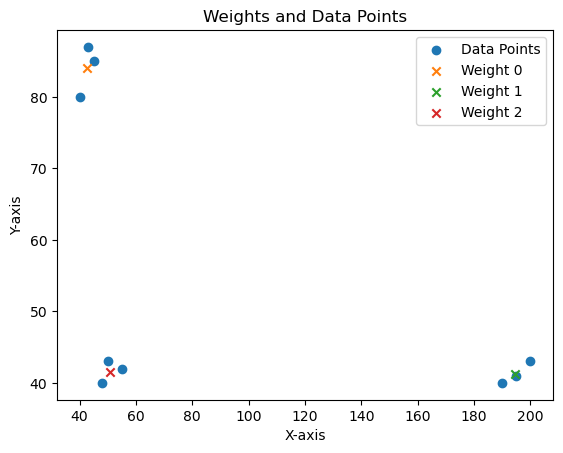

In [4]:
import matplotlib.pyplot as plt

x_values, y_values = zip(*data)

plt.scatter(x_values, y_values, label='Data Points')

for key, value in weights.items():
    plt.scatter(value[0], value[1], label=f'Weight {key}', marker='x')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Weights and Data Points')

plt.legend()

plt.show()